In [45]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [46]:
end = datetime.now()
start = datetime(end.year-40,end.month,end.day)

In [47]:
stock = "IBM"
TCS_data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [48]:
TCS_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1984-07-26,25.603489,25.991875,25.513863,25.872372,9.047536,4192368
1984-07-27,25.902246,26.201004,25.782743,26.051624,9.110216,4430856
1984-07-30,25.991875,26.141253,25.872372,25.902246,9.057982,2553914
1984-07-31,26.051624,26.499762,26.021749,26.440010,9.246037,5355520
1984-08-01,26.529636,27.067400,26.499762,26.977772,9.434093,6142112


In [49]:
TCS_data.shape

(10081, 6)

In [50]:
TCS_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10081.000000,10081.000000,10081.000000,10081.000000,10081.000000,1.008100e+04
mean,90.316723,91.156594,89.522759,90.349304,59.351986,7.148543e+06
std,54.231453,54.615351,53.876655,54.258570,43.791782,4.496699e+06
min,9.799235,9.978489,9.709608,9.799235,4.964166,6.390290e+05
25%,30.532984,30.742113,30.293978,30.532984,12.609879,4.329185e+06
50%,90.822182,91.845123,89.923515,90.860420,51.051041,5.998078e+06
75%,134.070007,135.139999,133.100006,134.158707,102.088333,8.573957e+06
max,205.908218,206.405350,204.875717,206.309753,195.835968,7.263916e+07


In [51]:
TCS_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10081 entries, 1984-07-26 to 2024-07-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10081 non-null  float64
 1   High       10081 non-null  float64
 2   Low        10081 non-null  float64
 3   Close      10081 non-null  float64
 4   Adj Close  10081 non-null  float64
 5   Volume     10081 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 551.3 KB


In [52]:
TCS_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Text(0.5, 1.0, 'Closing Price of TCS Data')

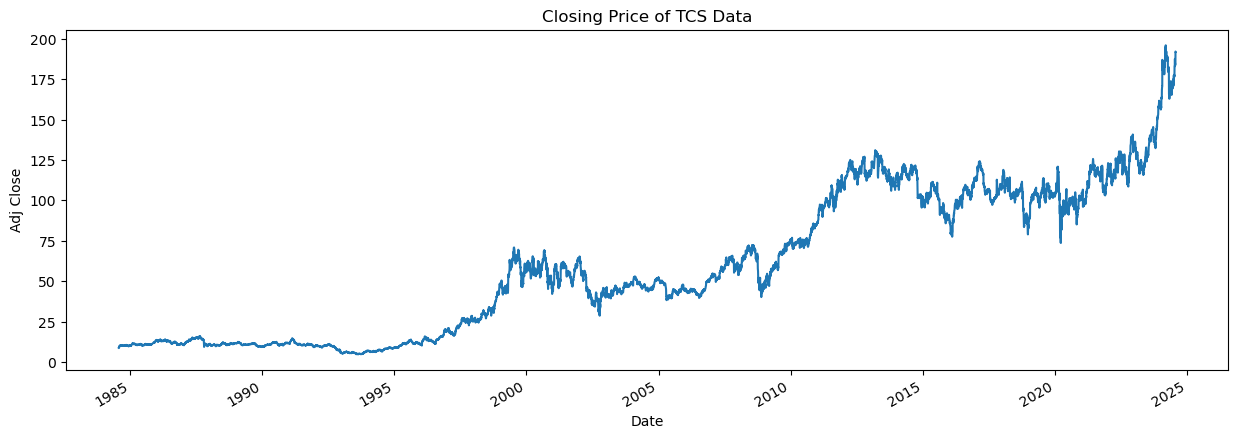

In [53]:
plt.figure(figsize=(15,5))
TCS_data['Adj Close'].plot()
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Closing Price of TCS Data')

In [54]:
def plot_graph(fig,values,col_name):
    plt.figure(figsize=fig)
    values.plot()
    plt.xlabel('Date')
    plt.ylabel(col_name)
    plt.title(f'{col_name} of TCS Data')

In [55]:
TCS_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

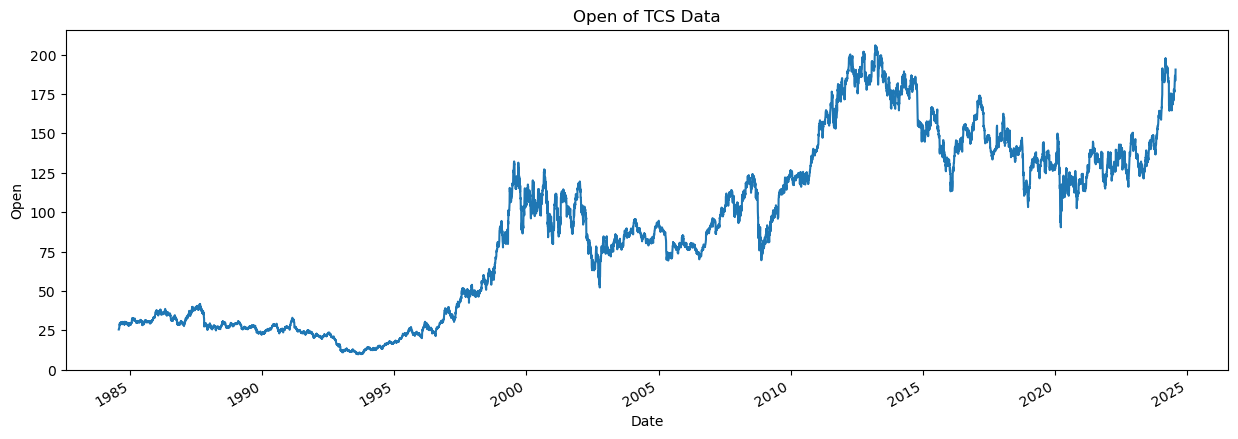

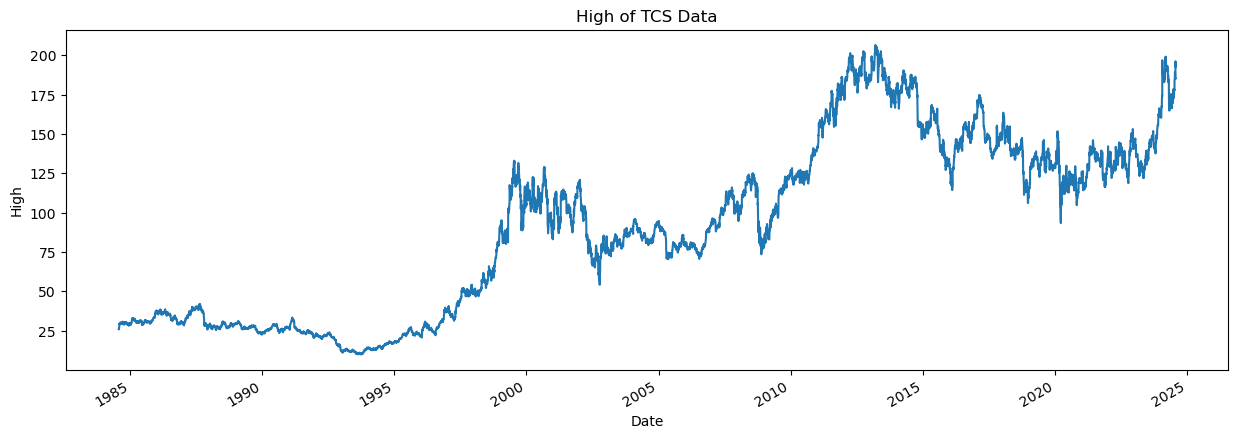

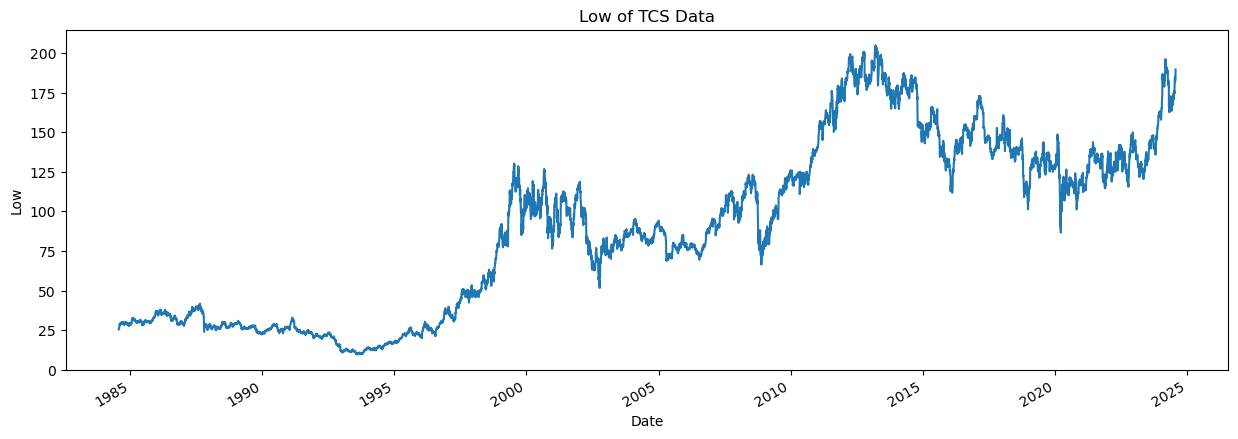

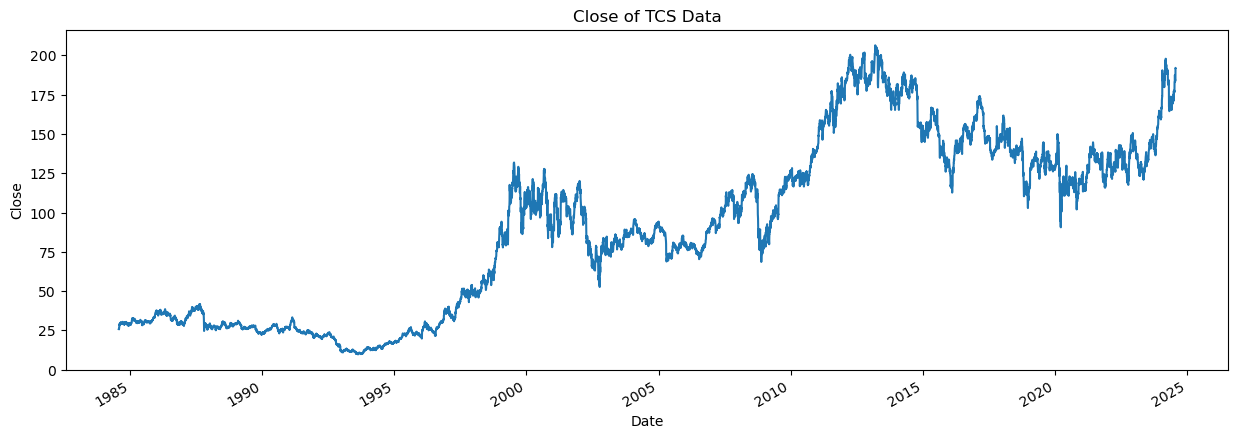

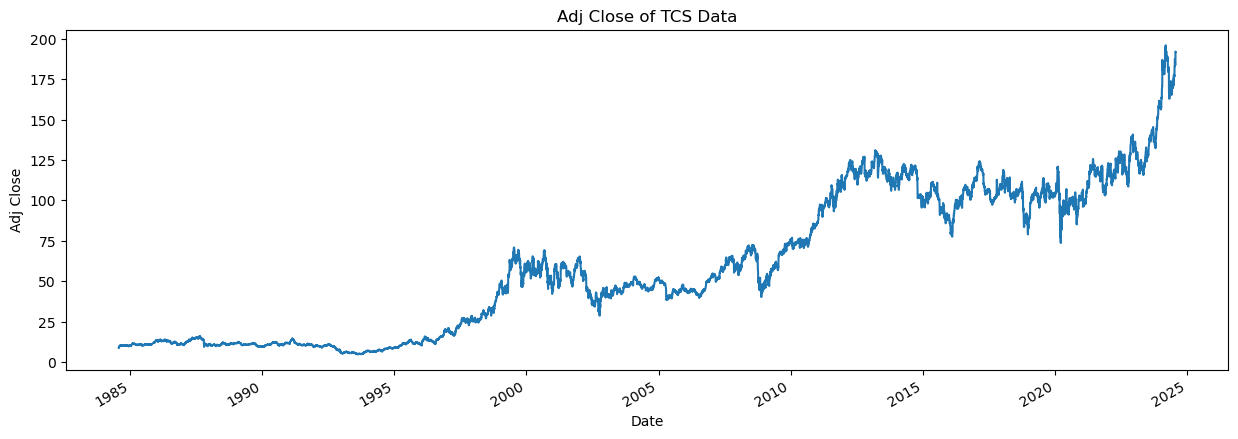

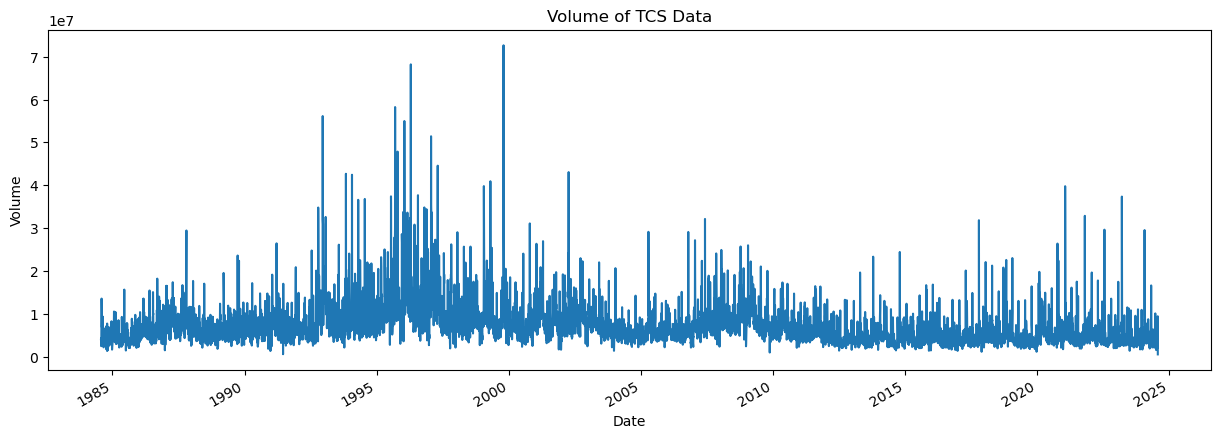

In [56]:
for i in TCS_data.columns:
    plot_graph((15,5),TCS_data[i],i)

In [57]:
for i in range(1984,2025):
    print(i,list(TCS_data.index.year).count(i))

1984 110
1985 252
1986 253
1987 253
1988 253
1989 252
1990 253
1991 253
1992 254
1993 253
1994 252
1995 252
1996 254
1997 253
1998 252
1999 252
2000 252
2001 248
2002 252
2003 252
2004 252
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 143


In [58]:
TCS_data['MA_for_240_days'] = TCS_data['Adj Close'].rolling(240).mean()
TCS_data['MA_for_240_days']

Date
1984-07-26           NaN
1984-07-27           NaN
1984-07-30           NaN
1984-07-31           NaN
1984-08-01           NaN
                 ...    
2024-07-22    163.423059
2024-07-23    163.606999
2024-07-24    163.797721
2024-07-25    164.018536
2024-07-26    164.239336
Name: MA_for_240_days, Length: 10081, dtype: float64

In [59]:
TCS_data['MA_for_240_days'][:240].tail()

Date
1985-07-01          NaN
1985-07-02          NaN
1985-07-03          NaN
1985-07-05          NaN
1985-07-08    10.706169
Name: MA_for_240_days, dtype: float64

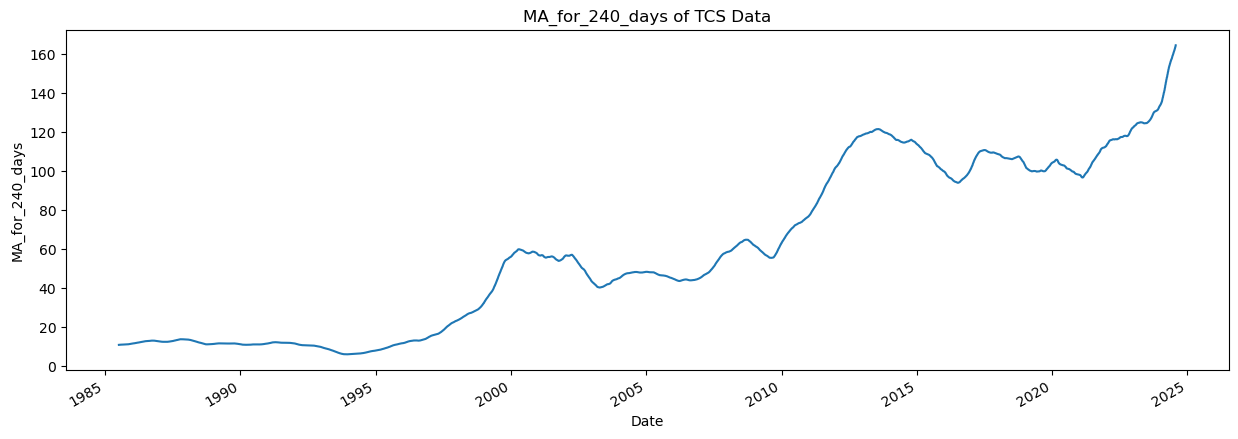

In [60]:
plot_graph((15,5),TCS_data['MA_for_240_days'],'MA_for_240_days')

<Figure size 1500x500 with 0 Axes>

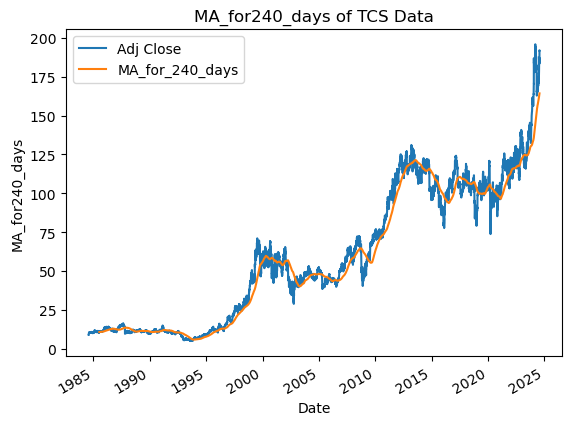

In [61]:
plot_graph((15,5),TCS_data[['Adj Close','MA_for_240_days']],'MA_for240_days')


<Figure size 1500x500 with 0 Axes>

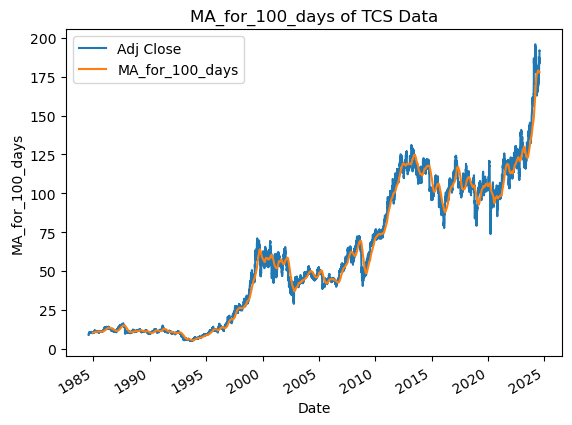

In [62]:
TCS_data['MA_for_100_days'] = TCS_data['Adj Close'].rolling(100).mean()
plot_graph((15,5),TCS_data[['Adj Close','MA_for_100_days']],'MA_for_100_days')

<Figure size 1500x500 with 0 Axes>

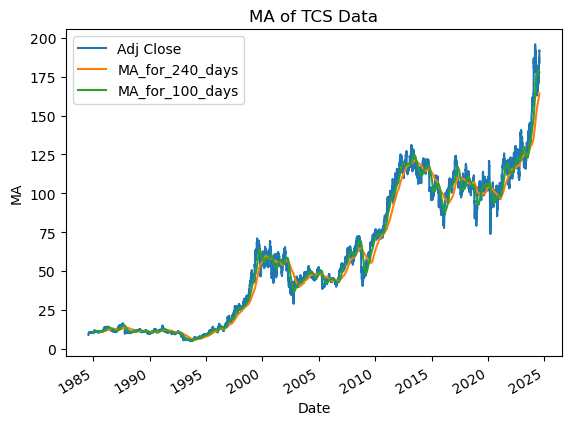

In [63]:
plot_graph((15,5),TCS_data[['Adj Close','MA_for_240_days','MA_for_100_days']],'MA')

In [64]:
TCS_data['percentage_change_cp'] = TCS_data['Adj Close'].pct_change()
TCS_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
1984-07-26,9.047536,NaN
1984-07-27,9.110216,0.006928
1984-07-30,9.057982,-0.005734
1984-07-31,9.246037,0.020761
1984-08-01,9.434093,0.020339


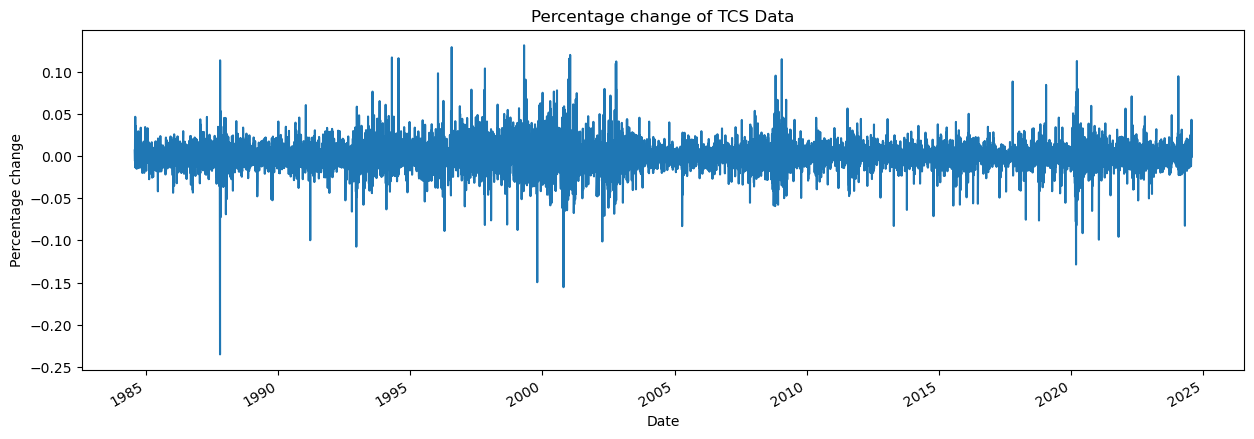

In [65]:
plot_graph((15,5),TCS_data['percentage_change_cp'],'Percentage change')

In [66]:
Adj_close_price = TCS_data[['Adj Close']]

In [67]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([195.83596802]), array([4.96416616]))

In [68]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(Adj_close_price)
scaled_data

array([[0.02139326],
       [0.02172165],
       [0.02144799],
       ...,
       [0.93809477],
       [0.9797981 ],
       [0.97911707]])

In [69]:
len(scaled_data)

10081

In [70]:
x_data = []
y_data = []

for i in range(200,len(scaled_data)):
    x_data.append(scaled_data[i-200:i])
    y_data.append(scaled_data[i])
    
x_data,y_data = np.array(x_data),np.array(y_data)

In [71]:
x_data[0],y_data[0]

(array([[0.02139326],
        [0.02172165],
        [0.02144799],
        [0.02243323],
        [0.02341848],
        [0.02429425],
        [0.02664789],
        [0.02730474],
        [0.02708578],
        [0.02635666],
        [0.02823472],
        [0.02751662],
        [0.02801376],
        [0.02757184],
        [0.02784807],
        [0.02840041],
        [0.02834517],
        [0.02845562],
        [0.02961561],
        [0.02878706],
        [0.02917372],
        [0.0294499 ],
        [0.02911847],
        [0.02939467],
        [0.02889752],
        [0.02862138],
        [0.02867659],
        [0.02812421],
        [0.02812421],
        [0.02851087],
        [0.02773755],
        [0.02823472],
        [0.02801376],
        [0.02812421],
        [0.02972608],
        [0.03000227],
        [0.03038894],
        [0.02994706],
        [0.02961561],
        [0.02967088],
        [0.02889752],
        [0.02867659],
        [0.02878706],
        [0.02906326],
        [0.02956038],
        [0

In [72]:
int(len(x_data)*0.7)

6776

In [73]:
5342-200-3739

1583

In [74]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [75]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6776, 400, 1)
(2905, 400, 1)
(6776, 1)
(2905, 1)


In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM, Dropout
from keras.layers import BatchNormalization

In [77]:
model = Sequential()
model.add(LSTM(512,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(256,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

c:\Users\Sahu Suraj\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [78]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [79]:
model.fit(x_train,y_train,batch_size=16,epochs=100)

Epoch 1/100
424/424 ━━━━━━━━━━━━━━━━━━━━ 562s 1s/step - loss: 0.0030
Epoch 2/100
424/424 ━━━━━━━━━━━━━━━━━━━━ 552s 1s/step - loss: 2.6909e-04
Epoch 3/100
424/424 ━━━━━━━━━━━━━━━━━━━━ 555s 1s/step - loss: 1.6124e-04
Epoch 4/100
424/424 ━━━━━━━━━━━━━━━━━━━━ 558s 1s/step - loss: 1.1893e-04
Epoch 5/100
424/424 ━━━━━━━━━━━━━━━━━━━━ 558s 1s/step - loss: 1.5545e-04
Epoch 6/100
424/424 ━━━━━━━━━━━━━━━━━━━━ 927s 2s/step - loss: 1.2743e-04
Epoch 7/100
 43/424 ━━━━━━━━━━━━━━━━━━━━ 15:20 2s/step - loss: 1.3545e-04

In [ ]:
model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 400, 512)       │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 256)            │       787,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,651,717 (21.56 MB)

 Trainable params: 1,883,905 (7.19 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,767,812 (14.37 MB)

In [ ]:
predictions = model.predict(x_test)
print(predictions.shape)
predictions

91/91 ━━━━━━━━━━━━━━━━━━━━ 37s 407ms/step
(2905, 1)


array([[0.58439624],
       [0.5826865 ],
       [0.5842129 ],
       ...,
       [0.9010079 ],
       [0.9013363 ],
       [0.9001504 ]], dtype=float32)

In [ ]:
inverse_pred = scalar.inverse_transform(predictions)
inverse_pred
predictions.shape

(2905, 1)

In [ ]:
inverse_y_test = scalar.inverse_transform(y_test)
inverse_y_test

array([[116.31182861],
       [116.65052795],
       [117.6000824 ],
       ...,
       [184.1000061 ],
       [184.02000427],
       [195.38000488]])

In [ ]:
rmse = np.sqrt(np.mean((inverse_pred-inverse_y_test)**2))
rmse

2.2138702701685373

In [ ]:
plotting_data = pd.DataFrame(
    {'Original_test_data': inverse_y_test.reshape(-1),
     'Predictions': inverse_pred.reshape(-1)
    },index = TCS_data.index[splitting_len+400:]
)
plotting_data.head()

,Original_test_data,Predictions
Date,,
2013-01-09,116.311829,116.508926
2013-01-10,116.650528,116.182579
2013-01-11,117.600082,116.473930
2013-01-14,116.493340,117.428482
2013-01-15,116.420761,116.385796


<Figure size 1500x500 with 0 Axes>

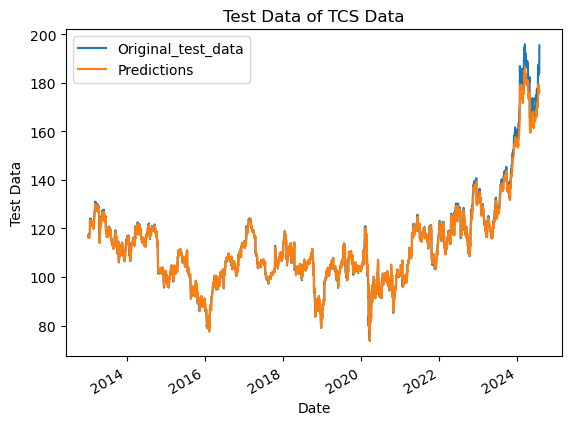

In [ ]:
plot_graph((15,5),plotting_data,'Test Data')

<Figure size 1500x500 with 0 Axes>

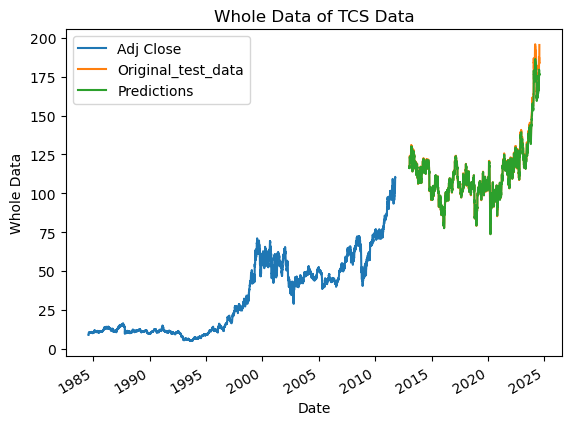

In [ ]:
plot_graph((15,5),pd.concat([Adj_close_price[:splitting_len+90],plotting_data],axis=0),'Whole Data')

In [ ]:
model.save('IBM_1.8_acc.keras')